In [19]:
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from pprint import pprint
import helpers
%matplotlib inline

In [78]:
%matplotlib inline

In [93]:
def dict_factory(cursor, row):
    d = {}
    for idx, col in enumerate(cursor.description):
        d[col[0]] = row[idx]
    return d

In [94]:
con = sqlite3.connect('/home/devyhia/face_detection/aflw/data/aflw.sqlite')
con.row_factory = dict_factory

In [95]:
cur = con.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
pprint(cur.fetchall())

[{'name': u'Faces'},
 {'name': u'sqlite_sequence'},
 {'name': u'FacePose'},
 {'name': u'FaceImages'},
 {'name': u'Databases'},
 {'name': u'FaceMetaData'},
 {'name': u'sqlite_stat1'},
 {'name': u'FaceRect'},
 {'name': u'AnnotationType'},
 {'name': u'FaceEllipse'},
 {'name': u'NearDuplicates'},
 {'name': u'FeatureCoords'},
 {'name': u'FeatureCoordTypes'},
 {'name': u'CamPose'}]


In [51]:
pprint(cur.execute('SELECT * from FacesMetaData LIMIT 2').fetchall())

OperationalError: no such table: FacesMetaData

In [54]:
from glob import glob

In [97]:
pprint(cur.execute('SELECT * from FaceImages where filepath LIKE "3%" LIMIT 5').fetchall())

[{'bw': 0,
  'db_id': u'flickr',
  'file_id': u'image00035.jpg',
  'filepath': u'3/image00035.jpg',
  'height': 500,
  'image_id': 15910,
  'width': 375},
 {'bw': 0,
  'db_id': u'flickr',
  'file_id': u'image00032.jpg',
  'filepath': u'3/image00032.jpg',
  'height': 333,
  'image_id': 15911,
  'width': 500},
 {'bw': 0,
  'db_id': u'flickr',
  'file_id': u'image00168.jpg',
  'filepath': u'3/image00168.jpg',
  'height': 500,
  'image_id': 15912,
  'width': 364},
 {'bw': 0,
  'db_id': u'flickr',
  'file_id': u'image00179.jpg',
  'filepath': u'3/image00179.jpg',
  'height': 1024,
  'image_id': 15913,
  'width': 683},
 {'bw': 0,
  'db_id': u'flickr',
  'file_id': u'image00091.jpg',
  'filepath': u'3/image00091.jpg',
  'height': 466,
  'image_id': 15914,
  'width': 700}]


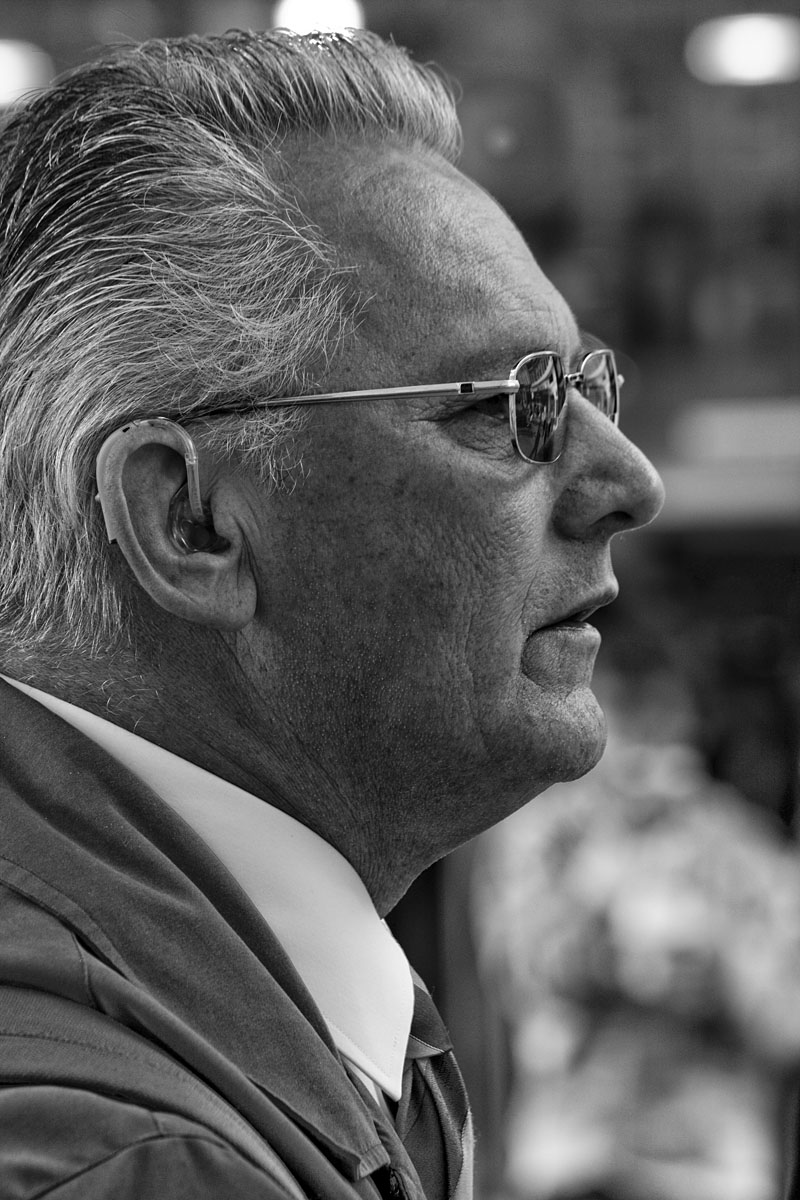

In [ ]:
Image.open('/home/devyhia/face_detection/aflw/data/flickr/3/image04573.jpg')

In [5]:
import sys
sys.path.append('/home/deeplearners/caffe/python/')

In [6]:
import caffe

In [8]:
from scipy.ndimage import imread

In [9]:
from glob import glob

In [189]:
img0 = glob('/home/devyhia/aflw/data/flickr/3/*')[100]

In [190]:
img0_content = imread(img0)

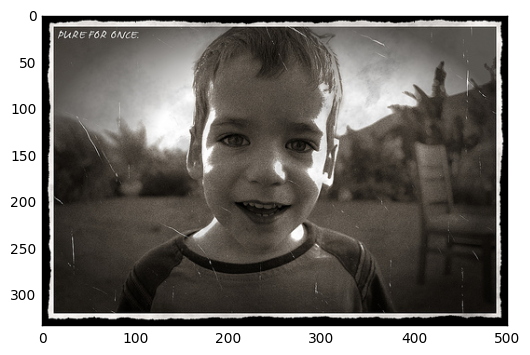

In [191]:
plt.imshow(img0_content)

In [20]:
caffe.set_device(0)
caffe.set_mode_gpu()

In [25]:
net = caffe.Net('/home/devyhia/vgg_face_caffe/VGG_FACE_deploy.prototxt',
                '/home/devyhia/vgg_face_caffe/VGG_FACE.caffemodel', caffe.TEST)

In [27]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

In [28]:
transformer.set_transpose('data', (2,0,1))

In [29]:
transformer.set_channel_swap('data', (2,1,0))

In [36]:
transformer.set_raw_scale('data', 224)

In [37]:
im = caffe.io.load_image(img0)

In [42]:
net.blobs['data'].data[...] = transformer.preprocess('data', im)

In [43]:
out = net.forward()

In [44]:
print out['prop']

KeyError: 'prop'

In [48]:
out['prob'].argmax()

157

In [49]:
out['prob'].shape

(1, 2622)

In [50]:
import dlib

ImportError: No module named dlib

In [55]:
!pip install dlib

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [57]:
import dlib

ImportError: libopenblas.so.0: cannot open shared object file: No such file or directory

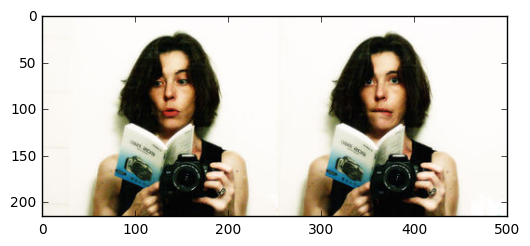

In [157]:
plt.imshow(imread('/home/devyhia/aflw/data/flickr/0/image10000.jpg'))

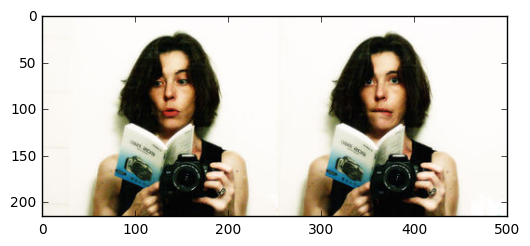

In [159]:
plt.imshow(imread('/home/devyhia/aflw/data/flickr/0/image10000.jpg'))

In [96]:
import json

In [97]:
coco_val = json.load(open('/home/devyhia/annotations/instances_val2014.json'))

In [102]:
coco_val.keys()

[u'info', u'images', u'licenses', u'annotations', u'categories']

In [104]:
coco_val['annotations'][0]

{u'area': 2765.1486500000005,
 u'bbox': [199.84, 200.46, 77.71, 70.88],
 u'category_id': 58,
 u'id': 156,
 u'image_id': 558840,
 u'iscrowd': 0,
 u'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]]}

In [124]:
coco_val['images'][2]

{u'coco_url': u'http://mscoco.org/images/184613',
 u'date_captured': u'2013-11-14 12:36:29',
 u'file_name': u'COCO_val2014_000000184613.jpg',
 u'flickr_url': u'http://farm3.staticflickr.com/2169/2118578392_1193aa04a0_z.jpg',
 u'height': 336,
 u'id': 184613,
 u'license': 3,
 u'width': 500}

In [106]:
coco_val_annot = {}

In [ ]:
N = len(coco_val['annotations'])
for i, a in enumerate(coco_val['annotations']):
    image_id = a['image_id']
    category_id = a['category_id']
    if image_id not in coco_val_annot:
        coco_val_annot[image_id] = []
    
    coco_val_annot[image_id] += [ category_id ]
    helpers.update_screen("\r{} out of {}".format(i+1, N))

17525 out of 291875

In [110]:
len(coco_val_annot.keys())

40137

In [116]:
coco_val_no_persons = []

In [118]:
for image_id, categories in coco_val_annot.iteritemste():
    if min(categories) > 1:
        coco_val_no_persons += [ image_id ]
    
    helpers.update_screen("{} -- {}".format(image_id, len(coco_val_no_persons)))

AttributeError: 'dict' object has no attribute 'iteritemste'

In [121]:
len(coco_val_no_persons)

18503

In [122]:
no_persons_images = []

In [125]:
coco_val_no_persons[0]

393225

In [129]:
with open('/home/devyhia/annotations/no_persons.txt', 'w') as f:
    f.write("\n".join(map(str, coco_val_no_persons)))

In [155]:
len(glob('/home/devyhia/coco-no-persons/*.jpg'))

1

In [138]:
import pandas as pd

In [141]:
res = pd.read_csv('/home/devyhia/annotations/no_persons.txt', header=None)

In [152]:
res.iloc[0, 0]

393225

In [153]:
import urllib

('/home/devyhia/coco-no-persons/393225.jpg',
 <httplib.HTTPMessage instance at 0x7f7f89171ef0>)

In [164]:
len(glob('/home/devyhia/aflw/data/flickr/0/*.jpg'))

7184

In [192]:
import Image

ImportError: No module named Image

In [193]:
!pip install Image

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [194]:
!ls /home/devyhia/.local/lib/python2.7/site-packages

appconf				jupyterlab-0.12.1.dist-info
deap				mock
deap-1.0.2.dist-info		mock-2.0.0.dist-info
django				pbr
Django-1.11.dist-info		pbr-1.10.0.dist-info
django_appconf-1.0.2.dist-info	pilkit
django_imagekit-4.0.dist-info	pilkit-2.0.dist-info
dlib				protobuf-3.1.0.dist-info
dlib-19.4.0.dist-info		protobuf-3.1.0-py2.7-nspkg.pth
external			runipy
funcsigs			runipy-0.1.5.dist-info
funcsigs-1.0.2.dist-info	tensorflow
google				tensorflow-0.12.0rc0.dist-info
image				tqdm
image-1.5.5.dist-info		tqdm-4.11.2.dist-info
imagekit			wheel
jupyterlab			wheel-0.29.0.dist-info


In [196]:
import image

In [199]:
image.Image

AttributeError: 'module' object has no attribute 'Image'

In [211]:
import tensorflow as tf

In [212]:
tf.__version__

'0.11.0rc2'

~/face_detection/coco-no-persons/neg_hard/24/

In [213]:
res = np.fromfile('/home/devyhia/face_detection/coco-no-persons/neg_hard/24/12_0.npy')

In [216]:
!cd /home/devyhia/A-Convolutional-Neural-Network-Cascade-for-Face-Detection/

In [220]:
sys.path.append('/home/devyhia/A-Convolutional-Neural-Network-Cascade-for-Face-Detection/')

In [224]:
import param
import os

In [225]:
neg_file_list = [f for f in os.listdir(param.neg_dir) if f.endswith(".jpg")]

In [276]:
neg_db_24 = np.empty((0,param.img_size_24,param.img_size_24,param.input_channel),np.float32)

In [277]:
neg_file_list = [f for f in os.listdir(param.neg_dir + "neg_hard/24/") if f.startswith("24_") and f.endswith(".npy")]

In [278]:
neg_arrays = [np.load(param.neg_dir + "neg_hard/24/" + db_name, mmap_mode='r') for nid,db_name in enumerate(neg_file_list)]

In [279]:
total_size = reduce(lambda prev, curr: prev + curr.shape[0], neg_arrays, 0)

In [280]:
total_size

18815020

In [285]:
neg_24_array = np.memmap(param.neg_dir + "neg_hard/24/24_all.npy", dtype='float32', mode='w+', shape=(total_size,24,24,3))

In [ ]:
cursor = 0
for i, arr in enumerate(neg_arrays):
    print("Processing array {}".format(i))
    total = arr.shape[0]
    neg_24_array[cursor:(cursor+total), :, :, :] = arr
    cursor += total

Processing array 0


In [289]:
neg_12_array.flush()

In [290]:
neg_24_array.flush()

In [292]:
np.load(param.neg_dir + "neg_hard/24/12_all.npy", mmap_mode='r')

IOError: Failed to interpret file '/home/devyhia/face_detection/coco-no-persons/neg_hard/24/12_all.npy' as a pickle

In [2]:
import Shared

In [3]:
Shared.select_gpu(1)

In [4]:
import sys
sys.path.append('/home/devyhia/A-Convolutional-Neural-Network-Cascade-for-Face-Detection/')

In [5]:
import numpy as np
import tensorflow as tf
from PIL import Image
from compiler.ast import flatten
import os
import sys
import math

import param
import util
import model

import random

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

#12net
input_12_node = tf.placeholder("float")
target_12_node = tf.placeholder("float", [None,1])
inputs_12 = np.zeros((param.mini_batch,param.img_size_12,param.img_size_12,param.input_channel), np.float32)

net_12 = model.detect_12Net(input_12_node,target_12_node)
net_12_calib = model.calib_12Net(input_12_node,target_12_node)
restorer_12 = tf.train.Saver([v for v in tf.all_variables() if "12det_" in v.name])
restorer_12.restore(sess, param.model_dir + "12-net.ckpt")
restorer_12_calib = tf.train.Saver([v for v in tf.all_variables() if "12calib_" in v.name])
restorer_12_calib.restore(sess, param.model_dir + "12-calib-net.ckpt")

#24net
input_24_node = tf.placeholder("float", [None, param.img_size_24, param.img_size_24, param.input_channel])
from_12_node = tf.placeholder("float",[None,16])
target_24_node = tf.placeholder("float", [None,1])
inputs_24 = np.zeros((param.mini_batch,param.img_size_24,param.img_size_24,param.input_channel), np.float32)

net_24 = model.detect_24Net(input_24_node,target_24_node,from_12_node)
net_24_calib = model.calib_24Net(input_24_node,target_24_node)
restorer_24 = tf.train.Saver([v for v in tf.all_variables() if "24det_" in v.name])
restorer_24.restore(sess, param.model_dir + "24-net.ckpt")
restorer_24_calib = tf.train.Saver([v for v in tf.all_variables() if "24calib_" in v.name])
restorer_24_calib.restore(sess, param.model_dir + "24-calib-net.ckpt")

#48net
input_48_node = tf.placeholder("float", [None, param.img_size_48, param.img_size_48, param.input_channel])
from_24_node = tf.placeholder("float",[None,128+16])
target_48_node = tf.placeholder("float", [None,1])
inputs_48 = np.zeros((param.mini_batch,param.img_size_48,param.img_size_48,param.input_channel), np.float32)

net_48 = model.detect_48Net(input_48_node,target_48_node,from_24_node)
net_48_calib = model.calib_48Net(input_48_node,target_48_node)
restorer_48 = tf.train.Saver([v for v in tf.all_variables() if "48det_" in v.name])
restorer_48.restore(sess, param.model_dir + "48-net.ckpt")
restorer_48_calib = tf.train.Saver([v for v in tf.all_variables() if "48calib_" in v.name])
restorer_48_calib.restore(sess, param.model_dir + "48-calib-net.ckpt")

In [6]:
import matplotlib.patches as patches

In [7]:
neg_file_list = [f for f in os.listdir(param.pos_dir+'/0/') if f.endswith(".jpg")]

In [50]:
neg_file_list = neg_file_list[:1000]

In [137]:
!wget http://s.afl.com.au/staticfile/AFL%20Tenant/Media/Images/396463-tlsnewslandscape.jpg

--2017-04-12 19:18:34--  http://s.afl.com.au/staticfile/AFL%20Tenant/Media/Images/396463-tlsnewslandscape.jpg
Resolving s.afl.com.au (s.afl.com.au)... 203.36.100.86, 203.36.100.68, 203.36.100.71
Connecting to s.afl.com.au (s.afl.com.au)|203.36.100.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53065 (52K) [image/jpeg]
Saving to: ‘396463-tlsnewslandscape.jpg’

396463-tlsnewslands 100%[===================>]  51.82K  76.7KB/s    in 0.7s    

2017-04-12 19:18:35 (76.7 KB/s) - ‘396463-tlsnewslandscape.jpg’ saved [53065/53065]



In [8]:
img_name = neg_file_list[1200]
img = Image.open(param.pos_dir + '/0/' + img_name)

In [138]:
img = Image.open('396463-tlsnewslandscape.jpg')

In [139]:
#check if gray
if len(np.shape(img)) != param.input_channel:
    img = np.asarray(img)
    img = np.reshape(img,(np.shape(img)[0],np.shape(img)[1],1))
    img = np.concatenate((img,img,img),axis=2)
    img = Image.fromarray(img)

In [ ]:
#12-net
#xmin, ymin, xmax, ymax, score, cropped_img, scale
result_box = util.sliding_window(img, param.thr_12, net_12, input_12_node)

#12-calib
result_db_tmp = np.zeros((len(result_box),param.img_size_12,param.img_size_12,param.input_channel),np.float32)
for id_,box in enumerate(result_box):
    result_db_tmp[id_,:] = util.img2array(box[5],param.img_size_12)

calib_result = net_12_calib.prediction.eval(feed_dict={input_12_node: result_db_tmp})
result_box = util.calib_box(result_box,calib_result,img)

#NMS for each scale
scale_cur = 0
scale_box = []
suppressed = []
for id_,box in enumerate(result_box):
    if box[6] == scale_cur:
        scale_box.append(box)
    if box[6] != scale_cur or id_ == len(result_box)-1:
        suppressed += util.NMS(scale_box)
        scale_cur += 1
        scale_box = [box]

result_box = suppressed
result_box = [f for f in result_box if f[4] > 0.5]
suppressed = []          

In [ ]:
len(result_box)

In [12]:
#24-net
result_db_12 = np.zeros((len(result_box),param.img_size_12,param.img_size_12,param.input_channel),np.float32)
result_db_24 = np.zeros((len(result_box),param.img_size_24,param.img_size_24,param.input_channel),np.float32)
for bid,box in enumerate(result_box):
    resized_img_12 = util.img2array(box[5],param.img_size_12)
    resized_img_24 = util.img2array(box[5],param.img_size_24)

    result_db_12[bid,:] = resized_img_12
    result_db_24[bid,:] = resized_img_24

from_12 = net_12.from_12.eval(feed_dict={input_12_node: result_db_12})
result = net_24.prediction.eval(feed_dict={input_24_node: result_db_24, from_12_node: from_12})
result_id = np.where(result > param.thr_24)[0]
result_box = [result_box[i] for i in result_id]

#24-calib
result_db_tmp = np.zeros((len(result_box),param.img_size_24,param.img_size_24,param.input_channel),np.float32)
for id_,box in enumerate(result_box):
    result_db_tmp[id_,:] = util.img2array(box[5],param.img_size_24)

calib_result = net_24_calib.prediction.eval(feed_dict={input_24_node: result_db_tmp})
result_box = util.calib_box(result_box,calib_result,img)

#NMS for each scale
scale_cur = 0
scale_box = []
suppressed = []
for id_,box in enumerate(result_box):
    if box[6] == scale_cur:
        scale_box.append(box)
    if box[6] != scale_cur or id_ == len(result_box)-1:
        suppressed += util.NMS(scale_box)
        scale_cur += 1
        scale_box = [box]

result_box = suppressed
result_box = [f for f in result_box if f[4] > 0.5]
suppressed = []

ResourceExhaustedError: OOM when allocating tensor with shape[2186,24,24,64]
	 [[Node: 24det_/Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_Placeholder_2_0/_97, 24det_/w1/read)]]

Caused by op u'24det_/Conv2D', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-751b239a3c3f>", line 36, in <module>
    net_24 = model.detect_24Net(input_24_node,target_24_node,from_12_node)
  File "/home/devyhia/A-Convolutional-Neural-Network-Cascade-for-Face-Detection/model.py", line 66, in __init__
    self.h_conv1 = tf.nn.relu(conv2d(inputs, self.w_conv1, 1) + self.b_conv1)
  File "/home/devyhia/A-Convolutional-Neural-Network-Cascade-for-Face-Detection/model.py", line 15, in conv2d
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding=pad)
  File "/home/deeplearners/tensorflow/local/lib/python2.7/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 394, in conv2d
    data_format=data_format, name=name)
  File "/home/deeplearners/tensorflow/local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/home/deeplearners/tensorflow/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/deeplearners/tensorflow/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[2186,24,24,64]
	 [[Node: 24det_/Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_Placeholder_2_0/_97, 24det_/w1/read)]]


In [ ]:
len(result_box)

In [394]:
#48-net
result_db_12 = np.zeros((len(result_box),param.img_size_12,param.img_size_12,param.input_channel),np.float32)
result_db_24 = np.zeros((len(result_box),param.img_size_24,param.img_size_24,param.input_channel),np.float32)
result_db_48 = np.zeros((len(result_box),param.img_size_48,param.img_size_48,param.input_channel),np.float32)

for bid,box in enumerate(result_box):
    resized_img_12 = util.img2array(box[5],param.img_size_12)
    resized_img_24 = util.img2array(box[5],param.img_size_24)
    resized_img_48 = util.img2array(box[5],param.img_size_48)

    result_db_12[bid,:] = resized_img_12
    result_db_24[bid,:] = resized_img_24
    result_db_48[bid,:] = resized_img_48

from_12 = net_12.from_12.eval(feed_dict={input_12_node: result_db_12})
from_24 = net_24.from_24.eval(feed_dict={input_24_node: result_db_24, from_12_node:from_12})

result = net_48.prediction.eval(feed_dict={input_48_node: result_db_48, from_24_node: from_24})
result_id = np.where(result > param.thr_48)[0]
result_box = [result_box[i] for i in result_id]


#global NMS
result_box = util.NMS(result_box)

#48-calib
result_db_tmp = np.zeros((len(result_box),param.img_size_48,param.img_size_48,param.input_channel),np.float32)
for id_,box in enumerate(result_box):
    result_db_tmp[id_,:] = util.img2array(box[5],param.img_size_48)

calib_result = net_48_calib.prediction.eval(feed_dict={input_48_node: result_db_tmp})
result_box = util.calib_box(result_box,calib_result,img)

In [ ]:
len(result_box)

In [134]:
img_best = reduce(lambda prev, curr: curr if curr[4] > prev[4] else prev, neg_box[1:], neg_box[0])

In [400]:
img_best = [ i for i in result_box if i[4] > 0.9999 ]

In [401]:
len(img_best)

1

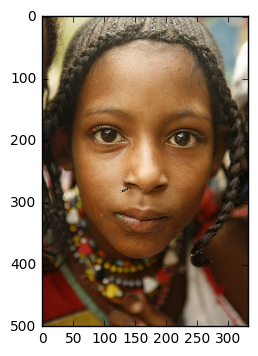

In [197]:
plt.imshow(img)

In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, aspect='equal')
ax2.imshow(img)
for i in range(len(img_best)):
    ax2.add_patch(
        patches.Rectangle(
            (img_best[i][0], img_best[i][1]),
            img_best[i][2] - img_best[i][0],
            img_best[i][3] - img_best[i][1],
            fill=False      # remove background
        )
    )

In [19]:
neg_db_tmp = np.zeros((len(neg_box),param.img_size_12,param.img_size_12,param.input_channel),np.float32)
for id_,box in enumerate(neg_box):
    neg_db_tmp[id_,:] = util.img2array(box[5],param.img_size_12)

In [20]:
calib_result = net_12_calib.prediction.eval(feed_dict={input_12_node: neg_db_tmp})

In [21]:
neg_box = util.calib_box(neg_box,calib_result,img)

In [22]:
len(neg_box)

4852

In [23]:
scale_cur = 0
scale_box = []
suppressed = []
for id_,box in enumerate(neg_box):
    if box[6] == scale_cur:
        scale_box.append(box)
    if box[6] != scale_cur or id_ == len(neg_box)-1:
        suppressed += util.NMS(scale_box)
        scale_cur += 1
        scale_box = [box]

neg_box = suppressed

In [25]:
len(neg_box)

3678

In [29]:
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from pprint import pprint
import helpers
%matplotlib inline

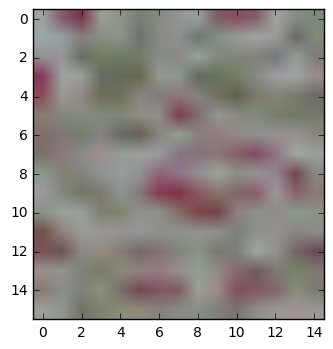

In [40]:
plt.imshow(neg_box[5][5])

In [177]:
sess.close()
tf.reset_default_graph()

In [254]:
res = np.load(param.neg_dir + "neg_hard/48/48_0.npy", mmap_mode='r')

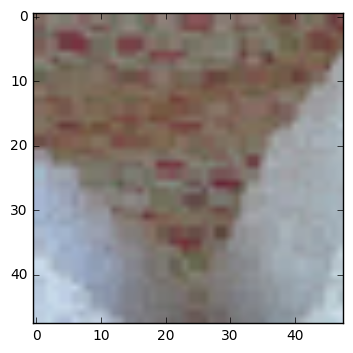

In [257]:
plt.imshow(res[0])

In [265]:
res48 = [ np.load(param.neg_dir + "neg_hard/48/48_{}.npy".format(i), mmap_mode='r') for i in range(6) ]

In [266]:
res24 = [ np.load(param.neg_dir + "neg_hard/48/24_{}.npy".format(i), mmap_mode='r') for i in range(6) ]

In [267]:
res12 = [ np.load(param.neg_dir + "neg_hard/48/12_{}.npy".format(i), mmap_mode='r') for i in range(6) ]

In [268]:
reduce(lambda prev, curr: prev + curr.shape[0], res48, 0)

884921

In [269]:
reduce(lambda prev, curr: prev + curr.shape[0], res24, 0)

884921

In [270]:
reduce(lambda prev, curr: prev + curr.shape[0], res24, 0)

884921

In [271]:
import data

In [273]:
pos_db_12, pos_db_24, pos_db_48 = data.load_db_detect_train_from_cache(48)

Loading positive training db (from cache) ...


In [278]:
pos_db_48.shape

(48762, 48, 48, 3)

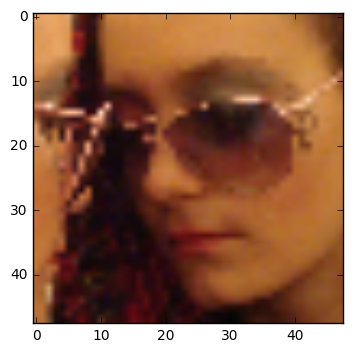

In [286]:
plt.imshow(pos_db_48[8])

In [293]:
neg_db_12 = np.empty((0,param.img_size_12,param.img_size_12,param.input_channel),np.float32)

In [294]:
neg_db_24 = np.empty((0,param.img_size_24,param.img_size_24,param.input_channel),np.float32)

In [302]:
[f for f in sorted(os.listdir(param.neg_dir + "neg_hard/48/")) if f.startswith("48_") and f.endswith(".npy")][:3]

['48_0.npy', '48_1.npy', '48_2.npy']

In [307]:
[f for f in os.listdir(param.neg_dir + "neg_hard/24/") if f.startswith("24_") and f.endswith(".npy")]

['24_4.npy',
 '24_5.npy',
 '24_6.npy',
 '24_2.npy',
 '24_0.npy',
 '24_3.npy',
 '24_1.npy']

In [384]:
sess.close()
tf.reset_default_graph()

In [83]:
parsed_line = line.split(',')

filename = parsed_line[0][3:-1]
xmin = int(parsed_line[1])
ymin = int(parsed_line[2])
xmax = xmin + int(parsed_line[3])
ymax = ymin + int(parsed_line[4][:-2])